# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
html = browser.html
mars_soup = BeautifulSoup(html, "html.parser")

In [6]:
# Extract all rows of data
rows_data = mars_soup.find_all("tr",class_="data-row")

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list
data_rows =[]

# Loop through the scraped data to create a list of rows
for row in rows_data:
    row_values = row.find_all("td")
    values = []
    for value in row_values:
        values.append(value.text.strip())
    data_rows.append(values)


    

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(data_rows, columns= ['id', 'terrestrial_date','sol','ls','month','min_temp','pressure'])

In [9]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [11]:
# Change data types for data analysis
mars_df["terrestrial_date"] = pd.to_datetime(mars_df["terrestrial_date"])
mars_df["sol"] = mars_df["sol"].astype(int)
mars_df["ls"] = mars_df["ls"].astype(int)
mars_df["month"] = mars_df["month"].astype(int)
mars_df["min_temp"] = mars_df["min_temp"].astype(float)
mars_df["pressure"] = mars_df["pressure"].astype(float)


In [12]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars?
months = mars_df["month"].max()
months

12

In [14]:
# 2. How many sols (Martian days) worth of data are there?
martian_days = len(mars_df["sol"].unique())
martian_days

1867

In [15]:
# 3. What is the average minimum temperature by month?
avg_min_temp = mars_df.groupby("month")["min_temp"].mean()
avg_min_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

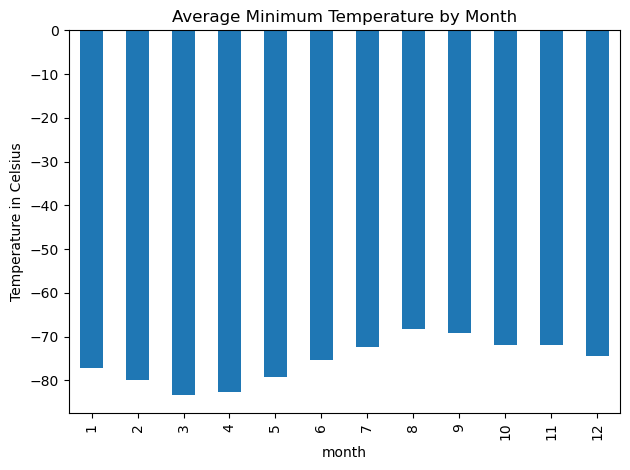

In [16]:
# Plot the average minimum temperature by month
avgtemp_bar = avg_min_temp.plot(kind="bar", title="Average Minimum Temperature by Month")
plt.xlabel("month")
plt.ylabel("Temperature in Celsius")
plt.tight_layout()
plt.show()

month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64


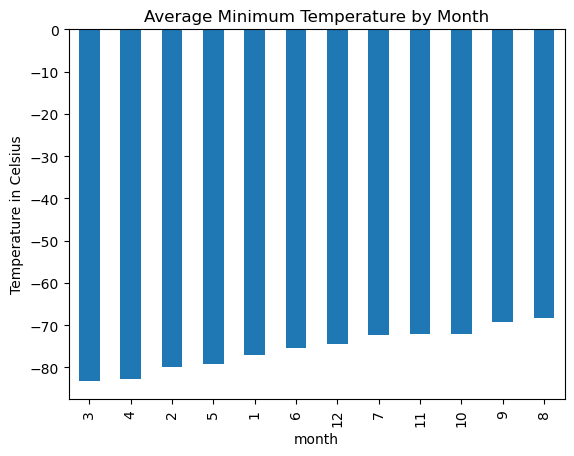

In [17]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_temperature = avg_min_temp.sort_values(ascending=True)
print(sorted_temperature)

sorted_temperature.plot(kind="bar", title="Average Minimum Temperature by Month")
plt.xlabel('month')
plt.ylabel('Temperature in Celsius')
plt.show()

In [18]:
hottest_month = sorted_temperature.idxmax()
hottest_temp = sorted_temperature.max()
print(f"The hottest month is {hottest_month} with an average temperature of {hottest_temp} degrees Celsius")
coldest_month = sorted_temperature.idxmin()
coldest_temp = sorted_temperature.min()
print(f"The coldest month is {coldest_month} with an average temperature of {coldest_temp} degrees Celsius")

The hottest month is 8 with an average temperature of -68.38297872340425 degrees Celsius
The coldest month is 3 with an average temperature of -83.30729166666667 degrees Celsius


In [19]:
# 4. What is the average pressure by month?
avg_pressure_monthly=mars_df.groupby("month")["pressure"].mean()
avg_pressure_monthly

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

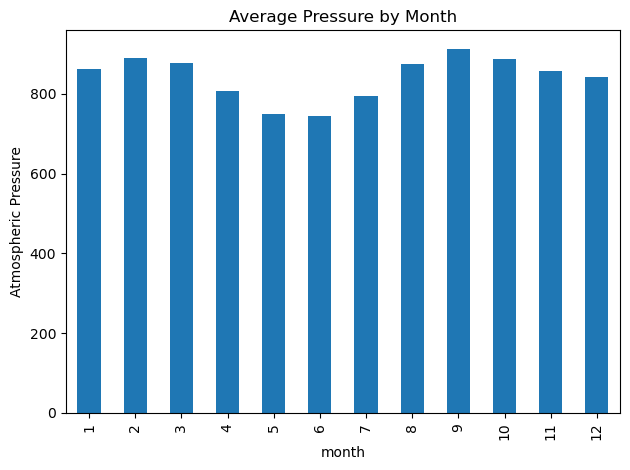

In [20]:
# Plot the average pressure by month
avg_pressure_monthly.plot(kind="bar", title="Average Pressure by Month")
plt.xlabel('month')
plt.ylabel('Atmospheric Pressure')
plt.tight_layout()
plt.show()

month
6     745.054422
5     748.557047
7     795.105634
4     806.329897
12    842.156627
11    857.014493
1     862.488506
8     873.829787
3     877.322917
10    887.312500
2     889.455056
9     913.305970
Name: pressure, dtype: float64


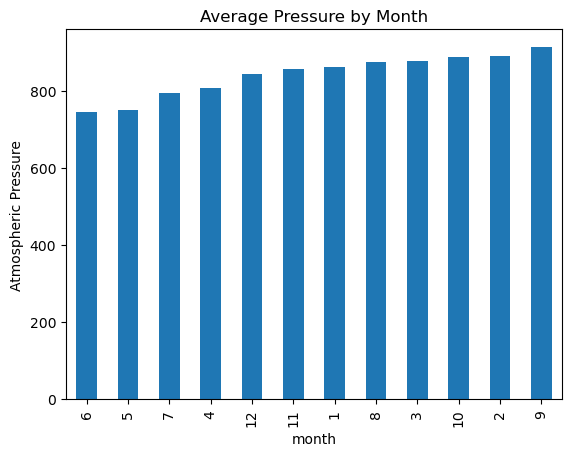

In [21]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_pressure = avg_pressure_monthly.sort_values(ascending=True)
print(sorted_pressure)

sorted_pressure.plot(kind="bar", title="Average Pressure by Month")
plt.xlabel('month')
plt.ylabel('Atmospheric Pressure')
plt.show()

In [26]:
highest_pressure_month = sorted_pressure.idxmax()
highest_pressure = sorted_pressure.max()
print(f"The highest pressure is in month # {highest_pressure_month} with an average pressure of {highest_pressure} ")
lowest_pressure_month = sorted_pressure.idxmin()
lowest_pressure = sorted_pressure.min()
print(f"The lowest pressure is in month # {lowest_pressure_month} with an average pressure of {lowest_pressure} ")

The highest pressure is in month # 9 with an average pressure of 913.3059701492538 
The lowest pressure is in month # 6 with an average pressure of 745.0544217687075 


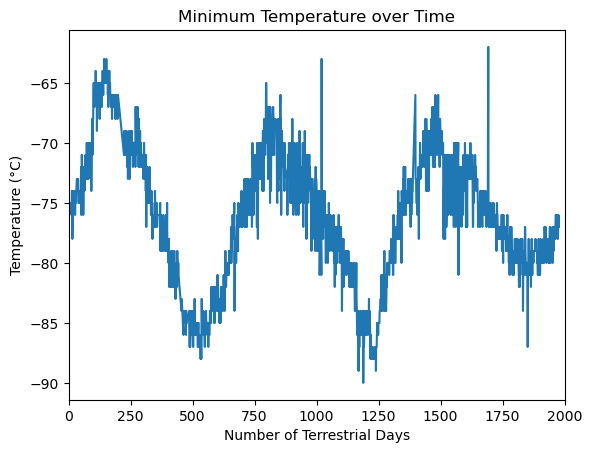

In [28]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
# 5. How many terrestrial (earth) days are there in a Martian year?

plt.plot(mars_df["sol"], mars_df["min_temp"])
plt.title("Minimum Temperature over Time")
plt.xlabel("Number of Terrestrial Days")
plt.ylabel("Temperature (°C)")
plt.xlim(0, 2000)
plt.show()


In [ ]:
#Look at the Peak-to-Peak Interval 
800 - 150 = 650 
1500 - 800 = 700

(650+700) / 2 = 675 

#from the website : https://science.nasa.gov/mars/facts/
# Martian days are called sols – short for "solar day." A year on Mars lasts 669.6 sols, which is the same as 687 Earth days.



#### Minimum Temperature

There are 12 months on Mars.

There are 1867 sols (Martian days) worth of data. 

We calculated the average minimum temperature by month and plottted a bar chart. 
This allowed us to identify the hottest and coldest month. 

Month #8 is the hotttest with an average temperature of -68.382978 Degrees Celsius 

Month #3 is the coldest with an average temperature of -83.30729 Degrees Ceslius.


#### Atmospheric Pressure

we calculate the average pressure by month and plotted a bar chart to represent the results. 


We found that:
The highest pressure is in month # 9 with an average pressure of 913.3059701492538 

The lowest pressure is in month # 6 with an average pressure of 745.0544217687075 



#### Year Length

We plotted a graph first and used the peak-to-peak method in the graph to get the number  of days in a full Martian Year. 

Peak-to-Peak represents the max temperature. From the graph, we identified 150,800, and 1500 terrestrial days to be the highest points in the cycle. 

Then we got the difference between 800 and 150 which is equivalent to 650 days, and between 1500 and 800 which is equivalent to 700 days. 

Averaging both these values we got 675 days. 

After looking on the Website, Martian days are called sols – short for "solar day." A year on Mars lasts 669.6 sols, which is the same as 687 Earth days.

We can conclude that we are close to the actual 687 Terrestrial Days in a Martian Year.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [29]:
# Write the data to a CSV
mars_df.to_csv("mars_weather.csv", header=True, index= False, date_format="%Y-%m-%d")

In [30]:
browser.quit()